In [1]:
import time, random, numpy as np, argparse, sys, re, os
from types import SimpleNamespace
import csv

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, f1_score, recall_score, accuracy_score

from utils import *

# change it with respect to the original model
from tokenizer import BertTokenizer
from bert import BertModel
from optimizer import AdamW
from tqdm import tqdm
import json

import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\K1191\anaconda3\envs\NLP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from classifier import *
from utils import *

In [3]:
class DotDict(dict):
    def __getattr__(self, key):
        try:
            return self[key]
        except KeyError:
            raise AttributeError(f"'DotDict' object has no attribute '{key}'")

    def __setattr__(self, key, value):
        self[key] = value

In [4]:
TQDM_DISABLE=False

args_dict = {
   "seed": 11711,
   "epochs": 10, # 10
   "option": "finetune",
   "use_gpu": True, # False
   "dev_out": "cfimdb-dev-output.txt",
   "test_out": "cfimdb-test-output.txt",
   "batch_size": 8, # 8
   "hidden_dropout_prob": 0.3,
   "lr": 1e-5 # 1e-3 for pretrain, 1e-5 for fine-tuning
}
args = DotDict(args_dict)

In [5]:
seed_everything(args.seed)
#args.filepath = f'{args.option}-{args.epochs}-{args.lr}.pt'

SST_JSON = './stats/sst_classifier_saved_metrics.json'
CFIMDB_JSON = './stats/cfimdb_classifier_saved_metrics.json'

print('Training Sentiment Classifier on SST...')
config = SimpleNamespace(
	filepath='sst-classifier.pt',
	lr=args.lr,
	use_gpu=args.use_gpu,
	epochs=args.epochs,
	batch_size=args.batch_size,
	hidden_dropout_prob=args.hidden_dropout_prob,
	train='data/ids-sst-train.csv',
	dev='data/ids-sst-dev.csv',
	test='data/ids-sst-test-student.csv',
	option=args.option,
	dev_out = 'predictions/'+args.option+'-sst-dev-out.csv',
	test_out = 'predictions/'+args.option+'-sst-test-out.csv'
)

stt_save_metrics = {
	"batch_size": config.batch_size,
	"lr": config.lr,
	"hidden_dropout_prob": config.hidden_dropout_prob,
	"option": config.option,
	"epoch": [],
	"train_loss": [],
	"train_acc": [],
	"train_f1": [],
	"dev_acc": [],
	"dev_f1": [],
	"test_acc": []
}

train(config, stt_save_metrics)

print('Evaluating on SST...')
test(config, stt_save_metrics)

# Save save_metrics to a JSON file
with open(SST_JSON, 'w') as f:
	json.dump(stt_save_metrics, f, indent=4)

print('Metrics saved to sst_classifier_saved_metrics.json')

Training Sentiment Classifier on SST...
load 8544 data from data/ids-sst-train.csv
load 1101 data from data/ids-sst-dev.csv


eval: 100%|██████████| 138/138 [00:03<00:00, 42.63it/s]


save the model to sst-classifier.pt
Epoch 0: train loss :: 1.243, train acc :: 0.592, dev acc :: 0.490


eval: 100%|██████████| 138/138 [00:03<00:00, 40.11it/s]


save the model to sst-classifier.pt
Epoch 1: train loss :: 0.960, train acc :: 0.731, dev acc :: 0.520


eval: 100%|██████████| 138/138 [00:03<00:00, 42.34it/s]


Epoch 2: train loss :: 0.769, train acc :: 0.838, dev acc :: 0.519


eval: 100%|██████████| 138/138 [00:03<00:00, 44.18it/s]


Epoch 3: train loss :: 0.571, train acc :: 0.894, dev acc :: 0.492


eval: 100%|██████████| 138/138 [00:03<00:00, 39.44it/s]


Epoch 4: train loss :: 0.391, train acc :: 0.912, dev acc :: 0.492


eval: 100%|██████████| 138/138 [00:03<00:00, 43.68it/s]


Epoch 5: train loss :: 0.274, train acc :: 0.964, dev acc :: 0.506


eval: 100%|██████████| 138/138 [00:02<00:00, 46.72it/s]


Epoch 6: train loss :: 0.205, train acc :: 0.964, dev acc :: 0.490


eval: 100%|██████████| 138/138 [00:03<00:00, 45.52it/s]


Epoch 7: train loss :: 0.166, train acc :: 0.962, dev acc :: 0.494


eval: 100%|██████████| 138/138 [00:03<00:00, 41.32it/s]


Epoch 8: train loss :: 0.127, train acc :: 0.967, dev acc :: 0.498


eval: 100%|██████████| 138/138 [00:03<00:00, 45.34it/s]


Epoch 9: train loss :: 0.114, train acc :: 0.981, dev acc :: 0.503
Evaluating on SST...
load model from sst-classifier.pt
load 1101 data from data/ids-sst-dev.csv


eval: 100%|██████████| 138/138 [00:02<00:00, 47.73it/s]


DONE DEV


eval: 100%|██████████| 277/277 [00:05<00:00, 50.19it/s]


DONE Test
dev acc :: 0.520
Metrics saved to stt_classifier_saved_metrics.json
Training Sentiment Classifier on cfimdb...
load 1707 data from data/ids-cfimdb-train.csv
load 245 data from data/ids-cfimdb-dev.csv


eval: 100%|██████████| 31/31 [00:37<00:00,  1.20s/it]


save the model to cfimdb-classifier.pt
Epoch 0: train loss :: 0.382, train acc :: 0.985, dev acc :: 0.963


eval: 100%|██████████| 31/31 [00:58<00:00,  1.89s/it]


save the model to cfimdb-classifier.pt
Epoch 1: train loss :: 0.088, train acc :: 0.990, dev acc :: 0.967


eval: 100%|██████████| 31/31 [00:47<00:00,  1.54s/it]


Epoch 2: train loss :: 0.055, train acc :: 0.957, dev acc :: 0.914


eval: 100%|██████████| 31/31 [01:06<00:00,  2.14s/it]


Epoch 3: train loss :: 0.049, train acc :: 0.997, dev acc :: 0.955


eval: 100%|██████████| 31/31 [00:44<00:00,  1.43s/it]


Epoch 4: train loss :: 0.024, train acc :: 0.998, dev acc :: 0.959


eval: 100%|██████████| 31/31 [00:42<00:00,  1.37s/it]


Epoch 5: train loss :: 0.015, train acc :: 0.999, dev acc :: 0.959


eval: 100%|██████████| 31/31 [00:31<00:00,  1.02s/it]


Epoch 6: train loss :: 0.007, train acc :: 1.000, dev acc :: 0.955


eval: 100%|██████████| 31/31 [00:43<00:00,  1.40s/it]


Epoch 7: train loss :: 0.010, train acc :: 0.999, dev acc :: 0.963


eval: 100%|██████████| 31/31 [00:33<00:00,  1.07s/it]


Epoch 8: train loss :: 0.006, train acc :: 1.000, dev acc :: 0.955


eval: 100%|██████████| 31/31 [00:32<00:00,  1.05s/it]


Epoch 9: train loss :: 0.010, train acc :: 1.000, dev acc :: 0.955
Evaluating on cfimdb...
load model from cfimdb-classifier.pt
load 245 data from data/ids-cfimdb-dev.csv


eval: 100%|██████████| 31/31 [00:04<00:00,  6.33it/s]


DONE DEV


eval: 100%|██████████| 61/61 [00:19<00:00,  3.09it/s]

DONE Test
dev acc :: 0.967
Metrics saved to cfimdb_classifier_saved_metrics.json


In [ ]:
print('Training Sentiment Classifier on cfimdb...')
config = SimpleNamespace(
	filepath='cfimdb-classifier.pt',
	lr=args.lr,
	use_gpu=args.use_gpu,
	epochs=args.epochs,
	batch_size=args.batch_size,
	hidden_dropout_prob=args.hidden_dropout_prob,
	train='data/ids-cfimdb-train.csv',
	dev='data/ids-cfimdb-dev.csv',
	test='data/ids-cfimdb-test-student.csv',
	option=args.option,
	dev_out = 'predictions/'+args.option+'-cfimdb-dev-out.csv',
	test_out = 'predictions/'+args.option+'-cfimdb-test-out.csv'
)

cfimdb_save_metrics = {
        "batch_size": config.batch_size,
        "lr": config.lr,
        "hidden_dropout_prob": config.hidden_dropout_prob,
        "option": config.option,
        "epoch": [],
        "train_loss": [],
        "train_acc": [],
        "train_f1": [],
        "dev_acc": [],
        "dev_f1": [],
        "test_acc": [],
        "test_f1": []
    }

train(config, cfimdb_save_metrics)

print('Evaluating on cfimdb...')
test(config, cfimdb_save_metrics)

# Save save_metrics to a JSON file
with open(CFIMDB_JSON, 'w') as f:
	json.dump(cfimdb_save_metrics, f, indent=4)

print('Metrics saved to cfimdb_classifier_saved_metrics.json')

In [3]:
### If skipping training and just needs visualization
SST_JSON = './stats/sst_classifier_saved_metrics.json'
CFIMDB_JSON = './stats/cfimdb_classifier_saved_metrics.json'

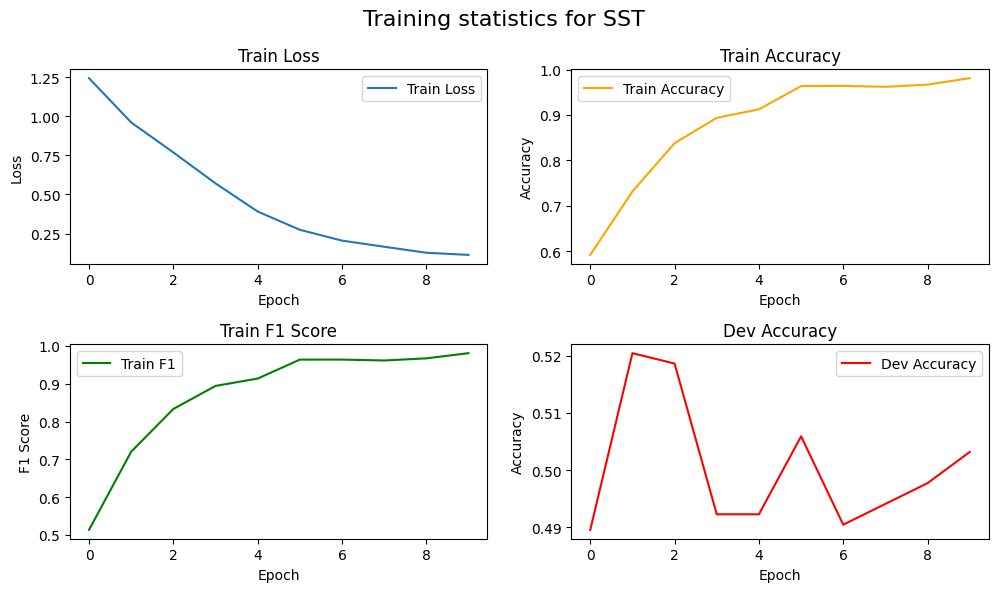

In [4]:
### Visualize SST_JSON
visualize_json(SST_JSON)


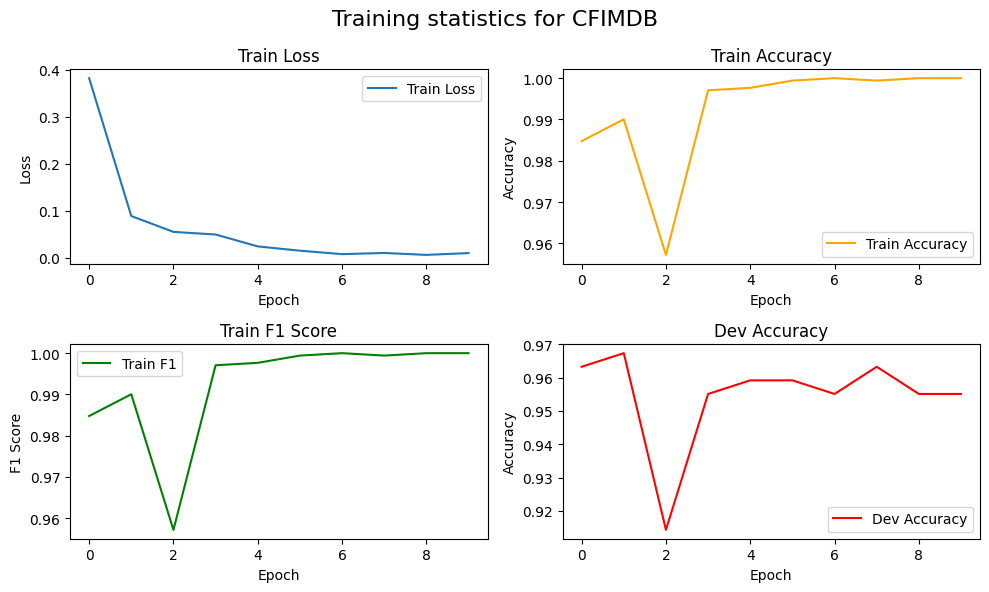

In [5]:
### Visualize CFIMDB_JSON
visualize_json(CFIMDB_JSON)